#                                                    DATA - 601 
#                             Report:  Analyse the Customer Behaviour On E-Commerce Platforms
Group #2:

Prashant Dhungana-30080130

Prateek Kaushik-30229287

Mariya Mathews-30192182

Arteen Rafiei-30043409

Nisha Pillai-30158934


# Introduction

The retail landscape has undergone a profound transformation over the past decade. Traditional stores have been supplemented and in the majority of cases replaced by online storefronts also known as e-commerce platforms. E-commerce platforms have redefined the way people shop offering variety, convenience, and accessibility. In just a matter of the last two years e-commerce sales increased by 67.5% in the Canadian retail market alone. As the customer demand for more convenient ways of shopping increases, understanding their behavior becomes an essential paramount for businesses to thrive. Thus, the aim of our project is to analyze customer behavior on e-commerce platforms for the sake of customer retention. As the use of e-commerce continues to evolve, it becomes important for businesses to conduct strategic methods to understand customer behavior to target and enhance customer experience ultimately correlating with higher sales.

The primary objective of our project is to analyze and understand attributes and factors that influence customer behavior on e-commerce platforms. The analysis will provide valuable and explicit information regarding customer behavior on e-commerce which is an important insight that businesses can use to improve their services and enhance customer satisfaction.


# Dataset

The dataset selected for undertaking our objective of diving deeper into online customer behavior is a comprehensive collection of customer interactions and purchasing patterns within the leading e-commerce ecosystem. The initial purpose of the author was to find out which customers would churn. Customers who churn, in this context, refers to customers who do not return to the respective e-commerce platform. In essence, the author’s intention with their dataset is similar to our objective. 

This dataset offers a structured and tabular format. It is organized into rows and columns, making it suitable for traditional analysis techniques. Each row represents a unique customer interaction and activity with respect to the e-commerce platform, while each column represents a specific attribute or variable associated with those interactions. It is worth mentioning that there are some missing values which will be explained in more detail in the data cleaning section of the task section. 
This dataset has 5360 unique values collected from 2019, that is 5360 unique customer interactions, and 20 columns.


# Importing Important Libraries



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Part 1. Data Import and understanding

Then we load the data from "E comm" sheet of excel file using pd.read_excel().Running head gives us a peek of our dataset. Although this doesn’t really tell us much about our data besides showing us how the data looks like.

In [3]:
#Data import and understanding
customer_behaviour_df = pd.read_excel("E Commerce Dataset.xlsx",sheet_name='E Comm')
customer_behaviour_df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


Calling "info()" on our dataset tells us tons of information about our data frame like the shape (rows, columns), the data type of our features, and the memory usage.

In [4]:
customer_behaviour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

"nunique()" is a method in the pandas library, which is a popular data manipulation and analysis library for Python. It is used to determine the number of unique (distinct) elements in a pandas object, such as a Series or a DataFrame column.

In [5]:
#get the count unique values in each column 
customer_behaviour_df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

"dtypes" expression is used in Python with the pandas library to display the data types of each column in a pandas DataFrame

In [6]:
#check datatype of each column
print("Column datatypes : ")
print(customer_behaviour_df.dtypes)

Column datatypes : 
CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object


By exploring the dataset, we now have a general idea of our dataset and the datatypes.

# Part 2: Data Cleaning

According the Wikipedia, Data Cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.
From this definition, we can say that the aspects of clean data are:Complete ,Correct ,Accurate ,Relevant

Importance: Data cleaning is a crucial step in the data science pipeline as the insights and results you produce is only as good as the data you have. As the old adage goes — garbage in, garbage out.
Using dirty data to produce analysis will result in erroneous predictions that engenders bad decisions and dangerous outcomes

Steps we have followed to clean the data is as follows:

## 2.1 Drop data that are not useful for Analysis
To begin, we decided to drop certain features or columns from our dataset. Now, this isn't a recommended practice because it leads to loss of valuable information. However, in our case, we were certain that some columns held no relevance for our analysis. By removing them upfront, before diving into other cleaning methods like filling in missing values, we managed to save a significant amount of time and effort.

In [7]:
#Dropping the columns which are not used in the analysis
customer_behaviour_df.drop(columns = ["CustomerID","CityTier","WarehouseToHome","NumberOfAddress","OrderAmountHikeFromlastYear"],inplace= True)
customer_behaviour_df.head()

,Churn,Tenure,PreferredLoginDevice,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,1,1.0,1.0,5.0,159.93
1,1,NaN,Phone,UPI,Male,3.0,4,Mobile,3,Single,1,0.0,1.0,0.0,120.90
2,1,NaN,Phone,Debit Card,Male,2.0,4,Mobile,3,Single,1,0.0,1.0,3.0,120.28
3,1,0.0,Phone,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,CC,Male,NaN,3,Mobile,5,Single,0,1.0,1.0,3.0,129.60


It is always a good idea to store the column names and keep it handy for further usage

In [8]:
#get list of columns
customer_behaviour_columns = list(customer_behaviour_df.columns)
customer_behaviour_columns

['Churn',
 'Tenure',
 'PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'Complain',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

Identifying the number of Null values in each column is required for further cleaning process

In [9]:
#Examine the missing values...........
print("Missing values distribution: ")  
print(customer_behaviour_df.isnull().sum()) #no change needed

Missing values distribution: 
Churn                         0
Tenure                      264
PreferredLoginDevice          0
PreferredPaymentMode          0
Gender                        0
HourSpendOnApp              255
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
Complain                      0
CouponUsed                  256
OrderCount                  258
DaySinceLastOrder           307
CashbackAmount                0
dtype: int64


Next, we categorize our features into numerical and categorical types

## 2.2 Cleaning the categorical data
Moving on to cleaning the categorical data, our focus was on eliminating duplicates and refining unique values within categorical columns. For instance, in the 'Preferred Order Category' column, we found instances where 'Mobile' and 'Mobile Phone' essentially meant the same thing. We standardized this by replacing 'Mobile' with 'Mobile Phone', simplifying our data.

In [10]:
#select the categorical datatype columns
customer_behaviour_categorical = customer_behaviour_df.select_dtypes(include=["category","object"]).columns
print(customer_behaviour_categorical)

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')


When you apply the describe() method to categorical columns, it provides details about the total count, the number of unique values, and the category with the highest occurrence along with its frequency.

In [11]:
customer_behaviour_df[customer_behaviour_categorical].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


Understanding each category of every categorical column is important.Below code is written to get details of each category in all the categorical columns.

In [12]:
#showing the unique values in each categorical column 
print("\nCategorical Columns with the unique values and counts ")
for col in customer_behaviour_categorical:
    print("\n")#Remove the +col**********
    print(customer_behaviour_df[col].value_counts())



Categorical Columns with the unique values and counts 


PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64


PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64


Gender
Male      3384
Female    2246
Name: count, dtype: int64


PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64


MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64


In [13]:
#replacing duplicates in Preferred Order category
customer_behaviour_df["PreferedOrderCat"] = customer_behaviour_df["PreferedOrderCat"].replace("Mobile","Mobile Phone")

In [14]:
#In the Preferred Login Device Category, Mobile Phone and Phone are the same.So replacing Phone to Mobile Phone
customer_behaviour_df["PreferredLoginDevice"] = customer_behaviour_df["PreferredLoginDevice"].replace("Phone","Mobile Phone")

In [15]:
#replacing the duplicates in the PreferredPaymentMode
customer_behaviour_df["PreferredPaymentMode"] = customer_behaviour_df["PreferredPaymentMode"].replace({"CC":"Credit Card","COD":"Cash on Delivery"})

## 2.3 Cleaning numerical data types

Then came the task of cleaning numerical data types. This involved identifying missing values and replacing them based on the available data points, using either the mean or the median. To make an informed decision between the mean and median, we needed to understand the distribution of the data. This is where histograms came in handy. By studying the shape of the data, we determined its skewness. Ultimately, we chose the median to replace the missing values, ensuring our dataset was not only complete but also accurate and reliable.


In [16]:
#Numerical datatype columns
customer_behaviour_numerical = customer_behaviour_df.select_dtypes(include=["number"]).columns
print(customer_behaviour_numerical)

Index(['Churn', 'Tenure', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'Complain', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')


In [17]:
customer_behaviour_df[customer_behaviour_numerical].describe()

,Churn,Tenure,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,Complain,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5375.000000,5630.000000,5630.000000,5630.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,2.931535,3.688988,3.066785,0.284902,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.721926,1.023999,1.380194,0.451408,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,3.000000,4.000000,3.000000,0.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,4.000000,4.000000,1.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,5.000000,6.000000,5.000000,1.000000,16.000000,16.000000,46.000000,324.990000


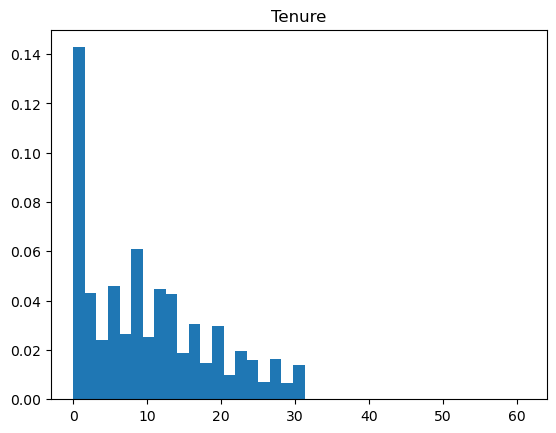

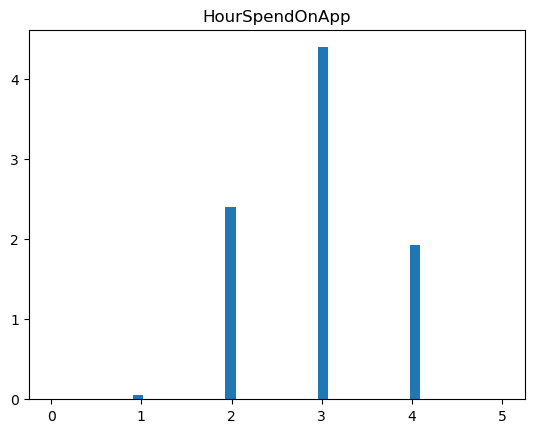

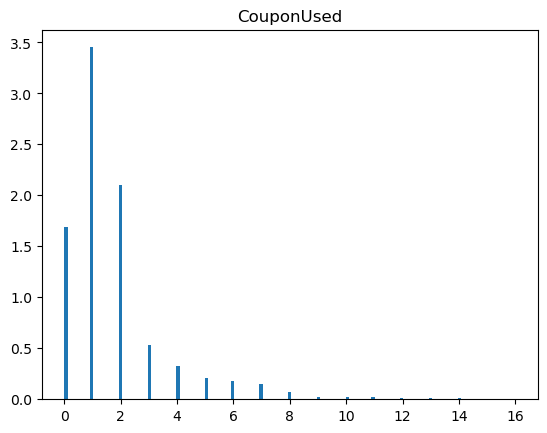

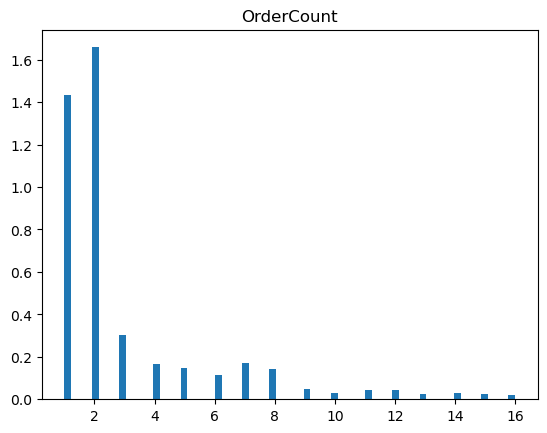

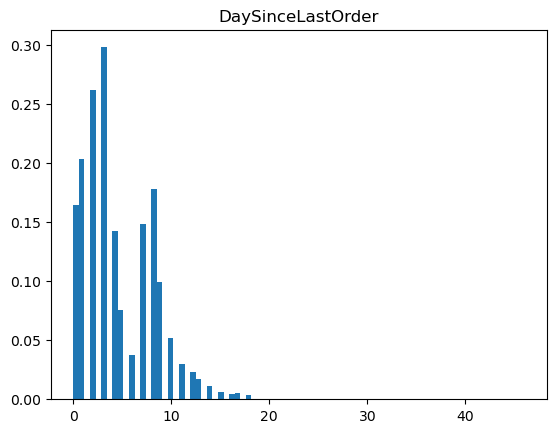

In [18]:
#understanding the distribution of Tenure,HoursSpendOnApp,CouponUsed ,OrderCount,DaySinceLastOrder to find what method to be used in fillna
for col in customer_behaviour_df[customer_behaviour_numerical]:
    if customer_behaviour_df[col].isnull().mean() > 0:
        plt.hist(customer_behaviour_df[col], bins='auto', density=True)
        plt.title(col)
        plt.show()

In [19]:
#fill na with medium values since the distribution is skewed distribution
for col in customer_behaviour_df[customer_behaviour_numerical]:
    if customer_behaviour_df[col].isnull().mean() > 0:
        customer_behaviour_df[col].fillna(customer_behaviour_df[col].median(), inplace=True)


In [20]:
#Retrieving the null value information after the cleaning
customer_behaviour_df.isnull().mean()

Churn                       0.0
Tenure                      0.0
PreferredLoginDevice        0.0
PreferredPaymentMode        0.0
Gender                      0.0
HourSpendOnApp              0.0
NumberOfDeviceRegistered    0.0
PreferedOrderCat            0.0
SatisfactionScore           0.0
MaritalStatus               0.0
Complain                    0.0
CouponUsed                  0.0
OrderCount                  0.0
DaySinceLastOrder           0.0
CashbackAmount              0.0
dtype: float64

# Part 3: Data Analysis and Visualization

**Customer Demographic and Preferences**

● To what extent does the time spent on the app relate to how frequently customers make purchases (Order count)?

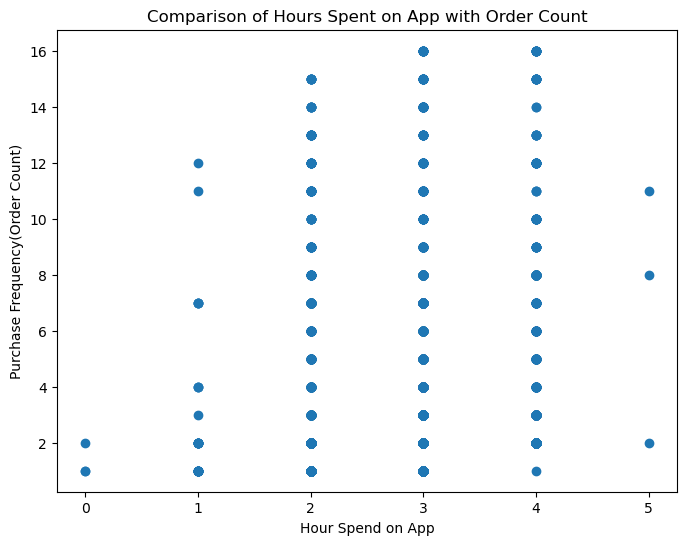

In [21]:
#does the time spent on the app relate to how frequently customers make purchases (Order count)
plt.figure(figsize=(8,6))
plt.scatter(y="OrderCount",x="HourSpendOnApp",data=customer_behaviour_df)
plt.title("Comparison of Hours Spent on App with Order Count")
plt.xlabel("Hour Spend on App")
plt.ylabel("Purchase Frequency(Order Count)")
plt.show()


From the scatterplot we observe a distribution of points that does not suggest strong or clear relationship between the hours spent on app and the purchase frequency. There is not a strong upward or downward trend. However, majority of the data points fall in between the 2 to 4 hours range for time spent and most of the order counts also varies in frequency. This indicates that while some users may place several orders with fewer hours on the app, others might spend a similar amount of time without reflecting the same purchasing behavior. From the scatterplot we can also infer that customers with similar hours spent on the app exhibit different purchasing patterns. Therefore, there may be other influencing factors that may that determine the order count as, the scatterplot does not support the notion that spending more time on the app correlates with an increase in number of orders. 

● Is there a notable difference between app usage and purchase frequency, and does this differ significantly between male and female customers?

/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

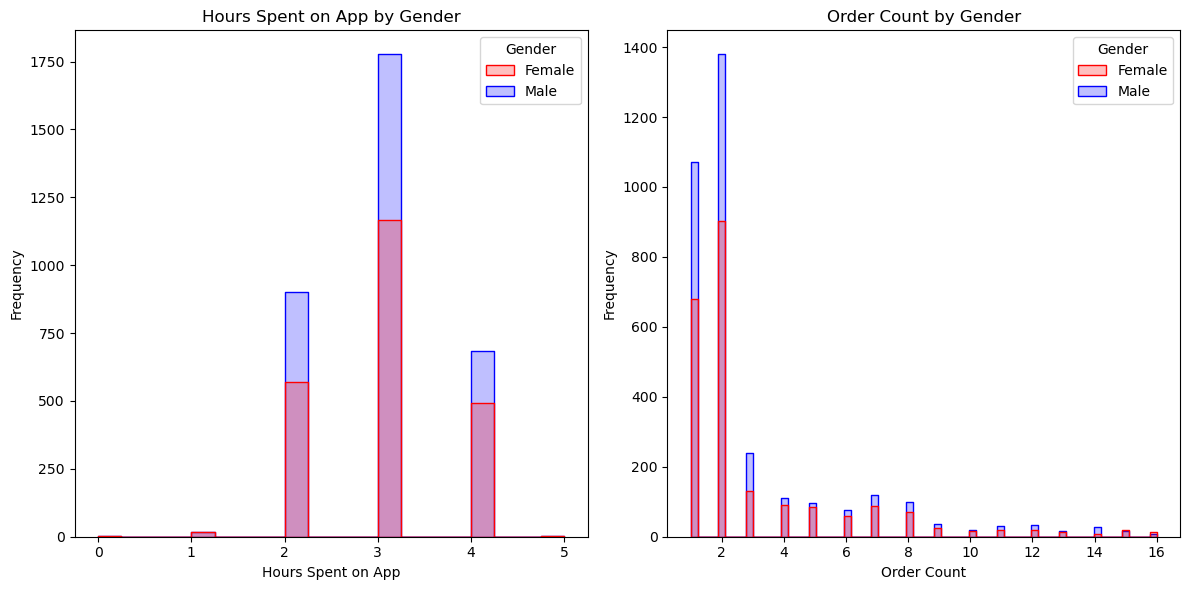

In [22]:
# Is there a notable difference between app usage and purchase frequency, and does this differ significantly between male and female customers?
# Filter relevant columns from the dataset
distplot_df = customer_behaviour_df[['HourSpendOnApp', 'OrderCount', 'Gender']]

# Create distribution plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=distplot_df, x='HourSpendOnApp', hue='Gender', element='step', palette={'Male': 'blue', 'Female': 'red'},bins=20)
plt.title('Hours Spent on App by Gender')
plt.xlabel('Hours Spent on App')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data=distplot_df, x='OrderCount', hue='Gender', element='step', palette={'Male': 'blue', 'Female': 'red'})
plt.title('Order Count by Gender')
plt.xlabel('Order Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


From the stacked histogram on the left comparing the distribution of hour spend on the with genders, we observe that both male and females have similar patters in terms of the app usage. On average, both genders tend to spend relatively lower number of hours in the app. From the stacked histogram on the right comparing the distribution of order count with genders, we observe that there is not a significantly strong difference in the order among both genders. However, we do see one similarity that the order count for both genders are relatively similar on the lower count. 

Overall, there are some differences in distribution between the two genders especially in the tails of the distribution, however they are not very distinctively different and appear to follow similar patterns. From the plot we can conclude that both males and females tend to spend less time on the and both have relatively lower order count.


● How does the choice of preferred login device relate to the amount of time spent on the app? Is there a correlation between login device preference and app usage?

/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


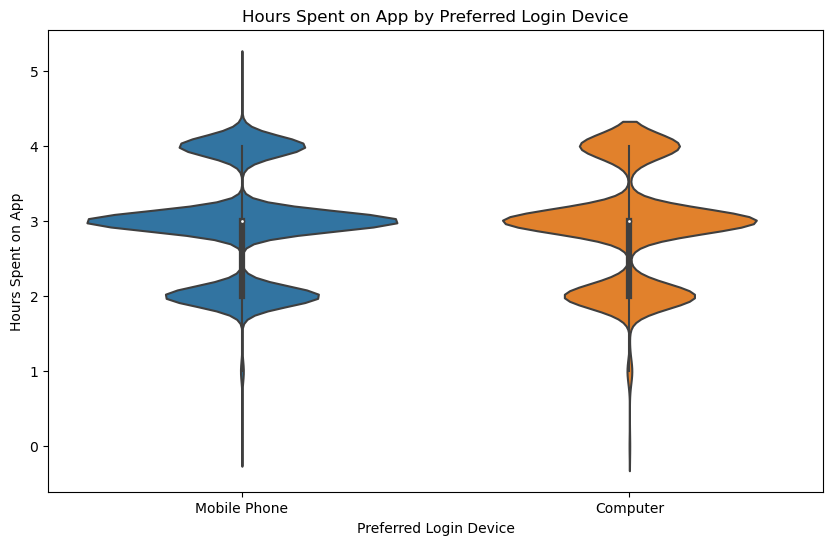

In [23]:
#How does the choice of preferred login device relate to the amount of time spent on the app? Is there a correlation between login device preference and app usage?
plt.figure(figsize=(10, 6))
sns.violinplot(x='PreferredLoginDevice', y='HourSpendOnApp', data=customer_behaviour_df)
plt.title('Hours Spent on App by Preferred Login Device')
plt.xlabel('Preferred Login Device')
plt.ylabel('Hours Spent on App')
plt.show()

From the violin plot we can see that mobile phone users spend on average about 3 hours. The shape of the violin stretch extends to the upper end of axis suggesting there are also, users that spend significantly more time on the app. The median is also situated in the lower end suggesting most users tend to be on the lower side of the app usage spectrum. 
The violin plot for the computer users also indicates that majority of the users spend the same amount of time on the app. However, computer users spread on the violin plot is more condensed suggesting less variability in comparison to the mobile users on the time spent.

From this we can conclude that both mobile phone and computer users spend less time in the app and form a common pattern. However, there lies a difference in the spread and density distribution between the two groups. Mobile phone users display a wider range of behaviors, including instances of very high usage, which is less common in the computer users.

From our analysis on Customer Behavior and engagement we gain some valuable insights such that there does not seem to be a strong correlation between the hours spend on the app and order counts as, customer exhibits varied purchasing behaviors. Both genders showed similar patterns in terms of hours spent on the app and order count, without any major differences. Also, both mobile phone and computers users spent relatively less time on the app however, mobile users exhibited a wider range of behaviors. 

Based on the analysis above we can strategically prioritize an efficient and user-friendly app design to target most users that prefer shorter interactions. We can also, create strategies on marketing that focuses on gender-neutral, as observed by the similar behaviors across genders. However, further analysis is needed to understand customer behavior and create strategies to provide more user friendly environment that will eventually reflect on the profits and growth of the e-commerce business. 


**Customer Behavior and Engagement**

● Are there any patterns forming between Preferred Order category and gender?

Customer behavior and Engagemnet refers to the actions and decisions customers take when searching for, purchasing, using, and evaluating products or services. It encompasses a wide range of activities, including what customers buy, where they shop, how often they make purchases, the products or services they prefer, and the factors that influence their decisions.

Before moving on to the next question, let's familiarize ourselves with the variables we will be focusing on. We will analyze Preferred Order Category, Gender, and Marital Status. Let's examine the proportions of each category in our dataset.

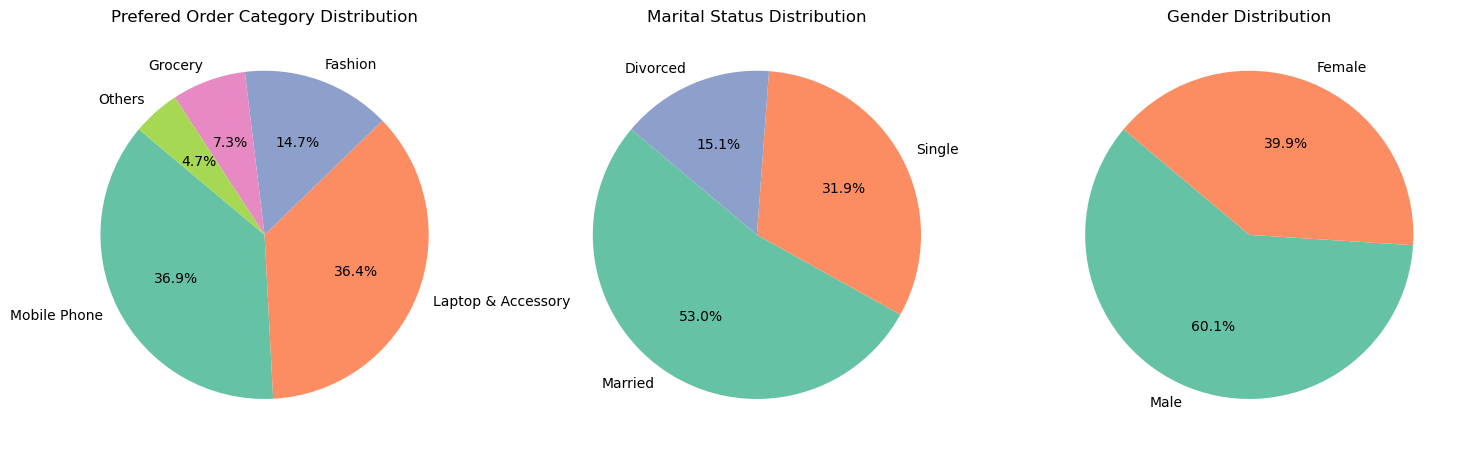

In [36]:
# Create subplots with 1 row and 3 columns
plt.figure(figsize=(18, 6))

preferred_order_cat_counts = customer_behaviour_df['PreferedOrderCat'].value_counts()
# Data and labels for PreferredOrderCat Pie Chart
order_labels = preferred_order_cat_counts.index
order_sizes = preferred_order_cat_counts.values
# Prefered Order Category Pie Chart
plt.subplot(1, 3, 1)
plt.pie(order_sizes, labels=order_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
plt.title('Prefered Order Category Distribution')

marital_counts = customer_behaviour_df['MaritalStatus'].value_counts()
# Data and labels for Marital Status Pie Chart
marital_labels = marital_counts.index
marital_sizes = marital_counts.values
# Marital Status Pie Chart
plt.subplot(1, 3, 2)
plt.pie(marital_sizes, labels=marital_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
plt.title('Marital Status Distribution')


gender_counts = customer_behaviour_df['Gender'].value_counts()
# Data and labels for Gender Pie Chart
gender_labels = gender_counts.index
gender_sizes = gender_counts.values
# Category Pie Chart
plt.subplot(1, 3, 3)
plt.pie(gender_sizes, labels=gender_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
plt.title('Gender Distribution')

plt.show()


The three pie charts above illustrate the distribution of unique categories within each variable. In the first chart, which represents Preferred Order Category, it becomes evident that "Mobile Phone" and "Laptop and Accessory" are the most preferred categories, accounting for nearly 70% of all orders. Following closely are Fashion, Grocery, and Other categories.

The second pie chart showcases the distribution of customers based on marital status (Married, Single, and Divorced). Notably, over 50% of the orders come from married individuals, followed by single individuals at approximately 31%, with the lowest contribution from divorced individuals.

Lastly, the third pie chart displays the gender distribution. Males account for 60% of the orders, while females make up the remaining 40%.
  

/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

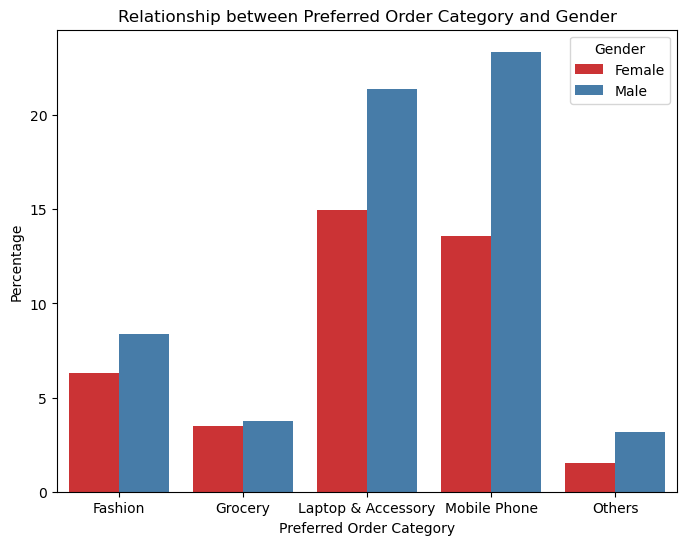

In [24]:
# Countplot (Bar plot)
# Calculate percentage values for each category
total_counts = customer_behaviour_df['PreferedOrderCat'].count()
gender_counts = customer_behaviour_df.groupby(['PreferedOrderCat', 'Gender']).size().reset_index(name='Counts')
gender_counts['Percentage'] = (gender_counts['Counts'] / total_counts) * 100

# Plot the barplot with percentage values
plt.figure(figsize=(8, 6))
sns.barplot(x='PreferedOrderCat', y='Percentage', hue='Gender', data=gender_counts, palette='Set1')
plt.xlabel("Preferred Order Category")
plt.ylabel("Percentage")
plt.title('Relationship between Preferred Order Category and Gender')
plt.show()

The bar plot demonstrates the correlation between gender and preferred order category. By representing the percentage of male and female users for different categories, we aimed to identify patterns. The analysis reveals similar ordering trends for both genders, yet males consistently outnumber females across all categories. This could be mainly because of the fact that about 60% of the totoal consulmers are male and only 40% is female.This suggests that there is no substantial link between gender and preferred order category.

Moreover, the data indicates that "Laptop and Accessory" and "Mobile Phone" together contribute to about half of the total market sales, highlighting their significant market presence.

● Does the preferred order category have any correlation with marital status?

/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariyamathews/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

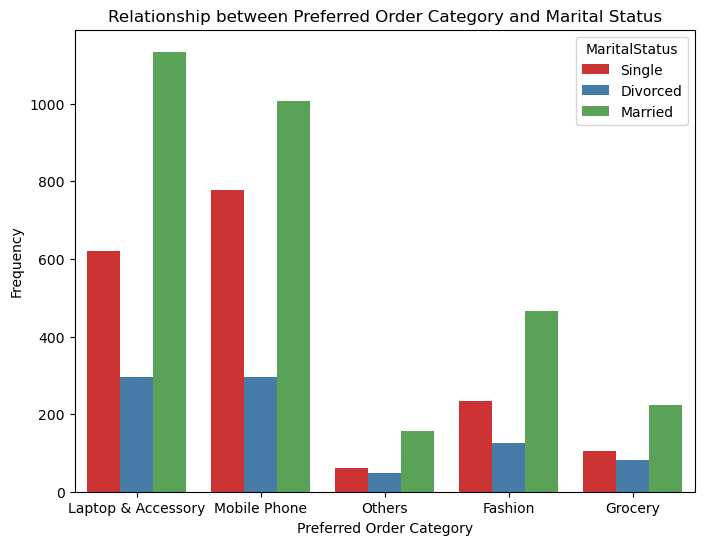

In [25]:
# Countplot (Bar plot)
plt.figure(figsize=(8, 6))
sns.countplot(x='PreferedOrderCat', hue='MaritalStatus', data=customer_behaviour_df, palette='Set1')
plt.title('Relationship between Preferred Order Category and Marital Status')
plt.xlabel("Preferred Order Category")
plt.ylabel("Frequency")
plt.show()

The grouped bar chart above clearly indicates that married individuals engage in more shopping activities compared to those who are single or divorced. This could be attributed to the fact that married people make up around 50% of the total customer base. Consequently, it can be inferred that there is no correlation between marital status and preferred order category, signifying that the choice of order category is independent of marital status. 

Additional information that can be inferred is, the prevailing trend continues to favor "Laptop and Accessories" and "Mobile Phone."

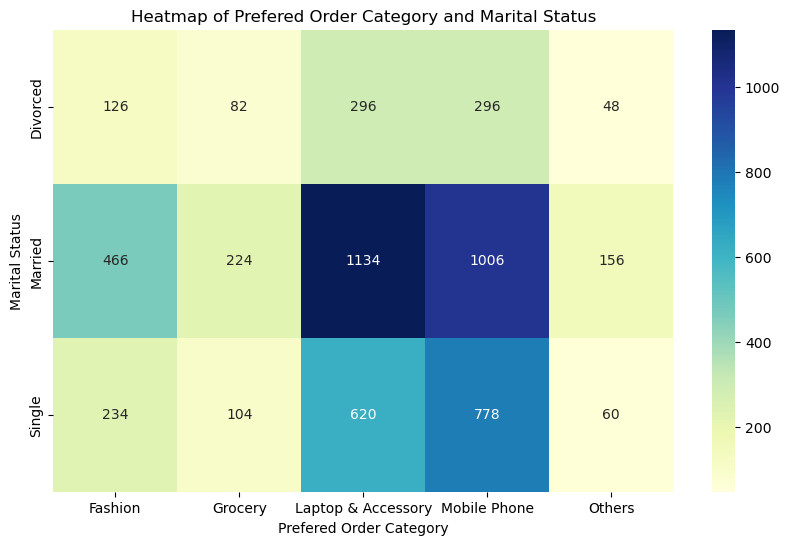

In [30]:
pivot_table = customer_behaviour_df.pivot_table(index='MaritalStatus', columns='PreferedOrderCat', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu',fmt='d')
plt.xlabel('Prefered Order Category')
plt.ylabel('Marital Status')
plt.title('Heatmap of Prefered Order Category and Marital Status')
plt.show()


The heatmap above provides a detailed view of the preferred order count for each category. The prominently highlighted blue columns in the heatmap's center indicate that "Laptop and Accessory" and "Mobile Phone" are the most favored orders among married individuals. Conversely, divorced individuals place the fewest orders in the "Other" category, and single people also show lower engagement with the "Others" category.

In [31]:
import plotly.express as px
fig = px.treemap(customer_behaviour_df, path=['PreferedOrderCat', 'MaritalStatus', 'Gender'])
fig.update_layout(title='Treemap Relationship between Prefered Order Category, Marital status and Gender', title_x=0.5)
fig.show()


The treemap above offers a structured perspective of our data, simplifying the identification of patterns like top-selling items. It encompasses all three categories, allowing us to visually grasp the proportion of each category's count in the dataset and determine specific customer segments to target. 

Conclusion: After thoroughly analyzing the preferred order categories, gender, and marital status, we have determined that there is no significant correlation between order categories and marital or gender status. The most preferred order categories remain consistent across all statuses and genders. In essence, our findings suggest that shopping preferences are not influenced by gender or marital status, challenging the conventional belief that shopping habits vary significantly between genders. It was particularly intriguing to discover that married individuals tend to place more orders for laptops, mobile phones, and accessories compared to their single counterparts. These insights into real customer behavior are invaluable for marketing and advertising strategies, highlighting the importance of recognizing that people generally shop in a gender-neutral manner.

● Does the number of orders change based on the coupons and cashback that the customer receives?

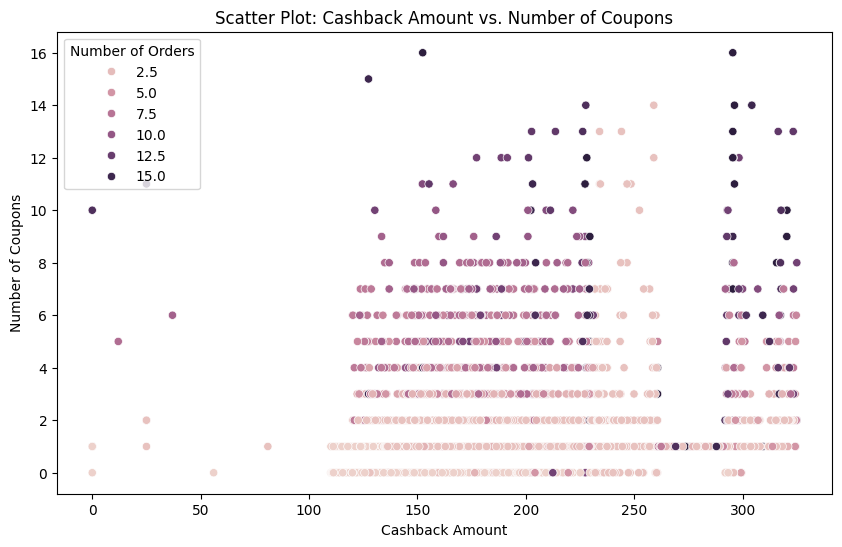

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_behaviour_df, x='CashbackAmount', y='CouponUsed', hue='OrderCount')
plt.title('Scatter Plot: Cashback Amount vs. Number of Coupons')
plt.xlabel('Cashback Amount')
plt.ylabel('Number of Coupons')
plt.legend(title='Number of Orders')
plt.show()

In [27]:
import plotly.express as px
fig = px.scatter_3d(
    customer_behaviour_df,
    x='CouponUsed',
    y='CashbackAmount',
    z='OrderCount',
    color='OrderCount',  # Color points by OrderCount
    opacity=0.7,          # Set opacity for better visibility
    title='3D Scatter Plot: OrderCount vs. CouponUsed vs. CashbackAmount'
)

# Customize axis labels
fig.update_layout(scene=dict(xaxis_title='CouponUsed', yaxis_title='CashbackAmount', zaxis_title='OrderCount'))

# Show the plot
fig.show()

**Customer Churn and Retention**

● Satisfaction score

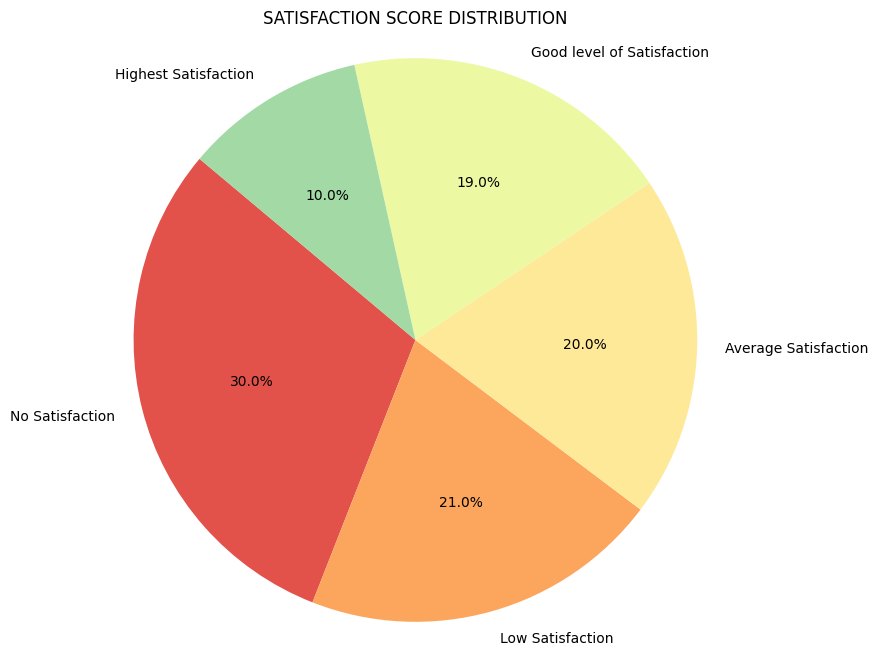

In [28]:
#define data for 1st pie of satisfaction score
data = customer_behaviour_df['SatisfactionScore'].value_counts()
labels = ['No Satisfaction', 'Low Satisfaction', 'Average Satisfaction','Good level of Satisfaction', 'Highest Satisfaction']
sizes = data.values

plt.figure(figsize=(8, 8))
sns.set_palette("Spectral")  # You can choose a different color palette.
plt.pie(sizes, labels=labels, autopct= lambda p: '{:.1f}%'.format(round(p)), startangle=140)
 
# Add a title to the chart.
plt.title('SATISFACTION SCORE DISTRIBUTION')

# Display the pie chart.
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

● Complaint and Churn rate

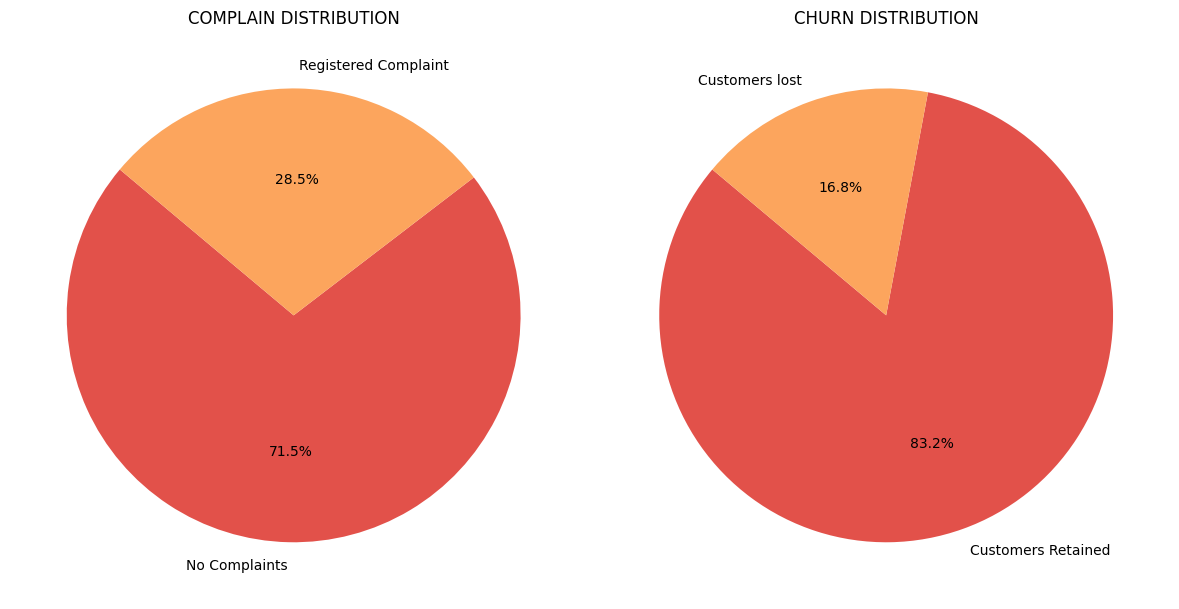

In [29]:
# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#define data for 1st pie of Complain
data = customer_behaviour_df['Complain'].value_counts()
labels1 = ['No Complaints', 'Registered Complaint']
sizes1 = data.values
axes[0].pie(sizes1, labels=labels1, autopct='%1.1f%%', startangle=140)
axes[0].set_title('COMPLAIN DISTRIBUTION')

#define data for 2nd pie of Churn
data = customer_behaviour_df['Churn'].value_counts()
labels2 = ['Customers Retained', 'Customers lost'] # 0 as "Customer Retained" and 1 as "Customer Lost."
sizes2 = data.values
axes[1].pie(sizes2, labels=labels2, autopct='%1.1f%%', startangle=140)
axes[1].set_title('CHURN DISTRIBUTION')


sns.set_palette("Spectral")  # You can choose a different color palette.
plt.tight_layout()

# Display the pie chart.
plt.show()

● What is the correlation of satisfaction score and complaints with the churn rate?

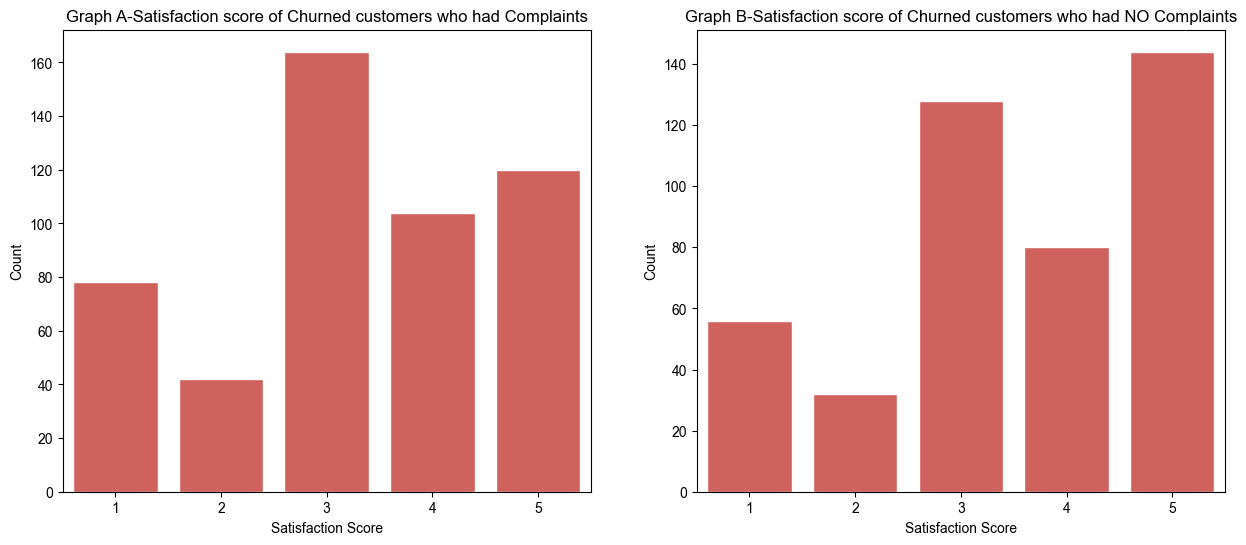

In [30]:
#SATISFACTION SCORES OF CUSTOMERS WHO HAD COMPLAINS AND WERE LOST TO COMPETITION
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

churned_customers_with_complaints = customer_behaviour_df[(customer_behaviour_df['Churn'] == 1) & (customer_behaviour_df['Complain'] == 1)]
churned_customers_without_complaints = customer_behaviour_df[(customer_behaviour_df['Churn'] == 1) & (customer_behaviour_df['Complain'] == 0)]

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a countplot or barplot to show the distribution of satisfaction scores
#plt.figure(figsize=(8, 6))
plt.rcParams["figure.figsize"] = (8,6)
sns.set_palette("rocket")  

#SATISFACTION SCORES OF CUSTOMERS WHO HAD COMPLAINS AND WERE LOST TO COMPETITION
sns.countplot(data=churned_customers_with_complaints, x='SatisfactionScore',ax=axes[0])

axes[0].set_title("Graph A-Satisfaction score of Churned customers who had Complaints")
axes[0].set_xlabel("Satisfaction Score")
axes[0].set_ylabel("Count")

#SATISFACTION SCORES OF CUSTOMERS WHO HAD NO COMPLAINS AND WERE LOST TO COMPETITION
sns.countplot(data=churned_customers_without_complaints, x='SatisfactionScore',ax=axes[1])
axes[1].set_title("Graph B-Satisfaction score of Churned customers who had NO Complaints")
axes[1].set_xlabel("Satisfaction Score")
axes[1].set_ylabel("Count")


# Show the plot
plt.show()

**Customer Satisfaction and Feedback**

● Does tenure have an impact on satisfaction scores and the number of complaints raised?

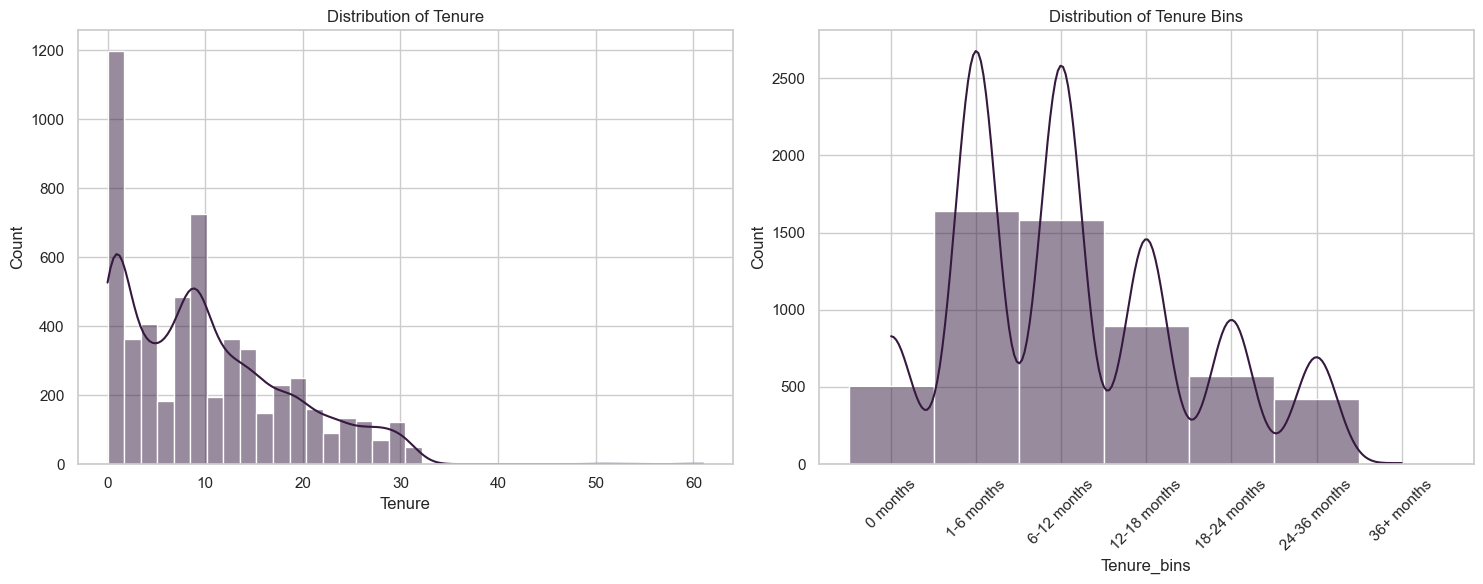

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
bins = [-1, 0, 6, 12, 18, 24, 36, float('inf')]
labels = ['0 months', '1-6 months', '6-12 months', '12-18 months', '18-24 months', '24-36 months', '36+ months']
customer_behaviour_df['Tenure_bins'] = pd.cut(customer_behaviour_df['Tenure'], bins=bins, labels=labels, right=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.histplot(customer_behaviour_df['Tenure'], bins=36, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Tenure')

sns.histplot(customer_behaviour_df['Tenure_bins'], bins=len(labels), kde=True, ax=axes[1])
axes[1].set_title('Distribution of Tenure Bins')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


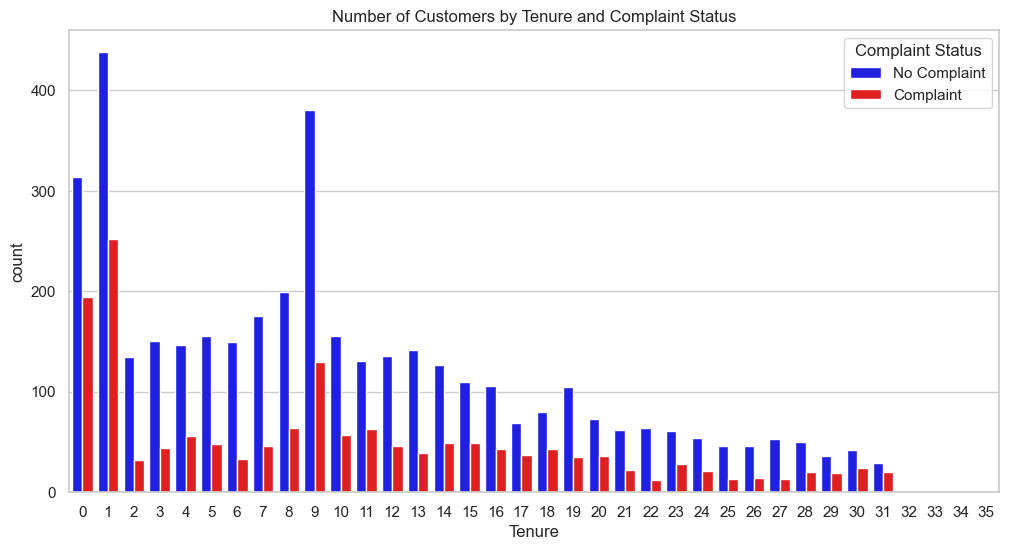

In [32]:
plt.figure(figsize=(12,6))

complain_palette = {0: "blue", 1: "red"}

sns.countplot(x='Tenure', hue='Complain', data=customer_behaviour_df, palette=complain_palette)

int_ticks = [int(tick) for tick in plt.gca().get_xticks()]
plt.xticks(ticks=plt.gca().get_xticks(), labels=int_ticks)

legend_labels, _= plt.gca().get_legend_handles_labels()
plt.legend(legend_labels, ['No Complaint', 'Complaint'], title="Complaint Status", loc="upper right")

plt.title('Number of Customers by Tenure and Complaint Status')

plt.show()

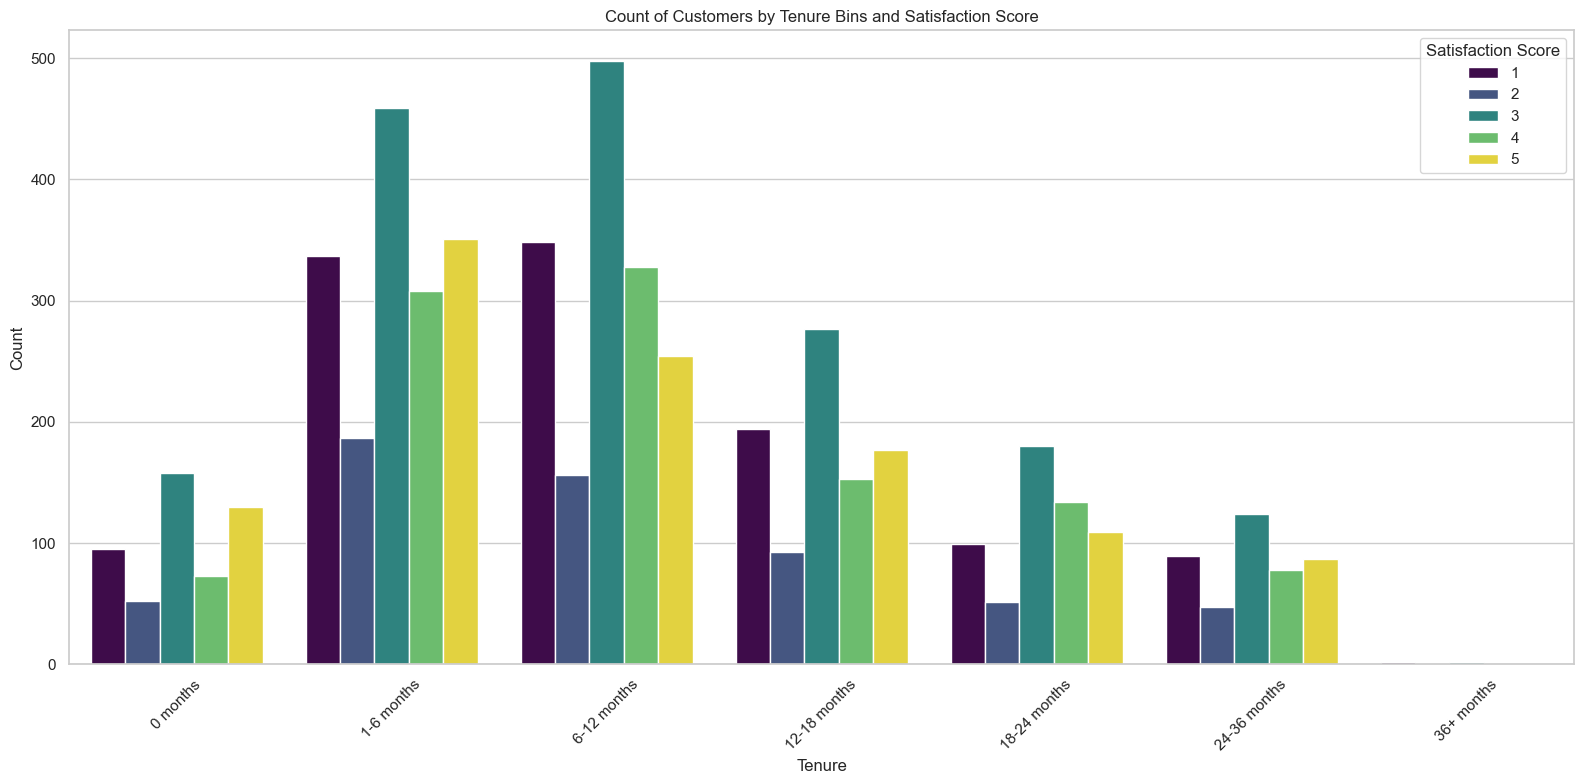

In [33]:
bins = [-1, 0, 6, 12, 18, 24, 36, float('inf')]
labels = ['0 months', '1-6 months', '6-12 months', '12-18 months', '18-24 months', '24-36 months', '36+ months']
customer_behaviour_df['Tenure_bins'] = pd.cut(customer_behaviour_df['Tenure'], bins=bins, labels=labels, right=True)

plt.figure(figsize=(16,8))

sns.countplot(data=customer_behaviour_df, x='Tenure_bins', hue='SatisfactionScore', order=labels, palette='viridis')

plt.xlabel("Tenure")
plt.ylabel("Count")
plt.title("Count of Customers by Tenure Bins and Satisfaction Score")
plt.xticks(rotation=45)
plt.legend(title='Satisfaction Score', loc='upper right')

plt.tight_layout()
plt.show()

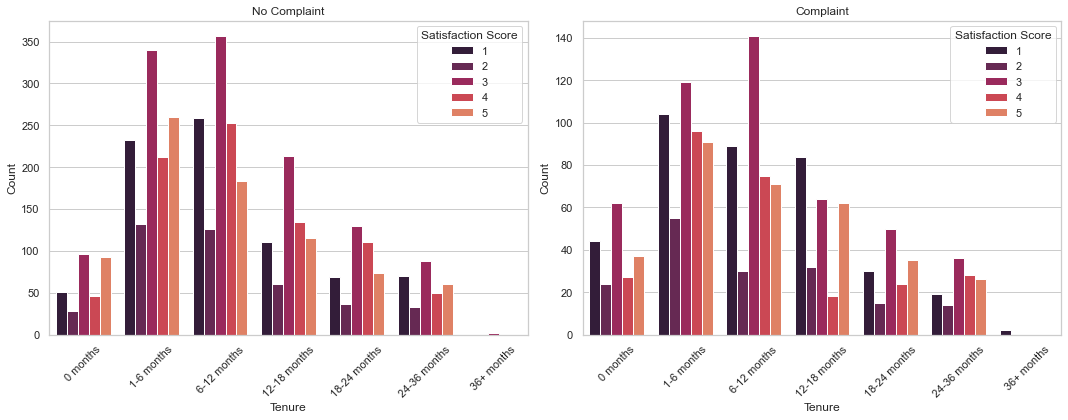

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

complaint_0 = customer_behaviour_df[customer_behaviour_df['Complain'] == 0]
sns.countplot(x='Tenure_bins', hue='SatisfactionScore', data=complaint_0, ax=axes[0], order=labels)
axes[0].set_title('No Complaint')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Tenure')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Satisfaction Score', loc='upper right')

complaint_1 = customer_behaviour_df[customer_behaviour_df['Complain'] == 1]
sns.countplot(x='Tenure_bins', hue='SatisfactionScore', data=complaint_1, ax=axes[1], order=labels)
axes[1].set_title('Complaint')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Tenure')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Satisfaction Score', loc='upper right')

plt.tight_layout()
plt.show()


**Conclusion**

Overall from our analysis we were able to find that Customer-Behavior data provides a significant amount of information to strategize their marketing appropriately. We were able to find that both genders have similar shopping patterns and on average spent the same amount of time on the app. The number of Coupons and CashbackAmount are equally important aspects of a successful business.

Furthermore, we found that customer’s satisfaction score and complaint status will not be the only factors for customers to churn away. There could be other factors that could influence the customer behavior. Additionally, customer’s tenure does not have an effect on neither satisfaction score nor complaint status. However, we can infer that newer members and veteran members have a higher probability of raising complaints.

Based on this analyis, businesses can strategize their marketing to push for more gender-neutral products to match customers preferences for a user-friendly environment.We have learned the importance of customer benefits such as coupons and cashback. And finally, we have learned the nature of customer behavior and customer satisfaction based on tenure. All of these attributes can give us great insights into future visualizations in regards to ecommerce platforms. 


**References**

[1]Arvai, Kevincommerce (2023, August 4). “K-mean Clustering in Python:  A Practical Guide.”https://realpython.com/k-means-clustering-python/

[2]Countants. (2020, January 5). Why consumer behavior analysis is so relevant to the ecommerce business? Medium https://medium.datadriveninvestor.com/why-consumer-behavior-analysis-is-so-relevant-to-the-ecommerce-business-8f49c250ca9c

[3]“Ecommerce - Canada: Statista Market Forecast.” Statista. (n.d). https://www.statista.com/outlook/dmo/ecommerce/canada.

[4]Matplotlib. plot(x, y) - Matplotlib 3.8.0 documentation. (n.d.). https://matplotlib.org/stable/plot_types/basic/plot.html 

[5]Predoiu, O. (2023, September 21). Customer behavior analysis. Omniconvert Ecommerce Growth Blog. https://www.omniconvert.com/blog/customer-behavior-analysis/

[6]Verma, Ankit.(2023, July 6). “E-commerce Dataset.” (CC BY-NC-SA 4.0) creativecommon.org  https://creativecommons.org/licenses/by-nc-sa/4.0/

[7]Verma,(2021, January 26) A. Ecommerce customer churn analysis and prediction. Kaggle. https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

[8]Zanzana, Salim, and Jessica Martin. (2023, February 21). Retail e-commerce and COVID-19: How online sales evolved as in-person shopping resumed. https://www150.statcan.gc.ca/n1/pub/11-621-m/11-621-m2023002-eng.htm.